# Load Fashion MNIST


In [1]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_full, y_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_full[:5000] / 255.0, X_full[5000:] / 255.0
y_valid, y_train = y_full[:5000], y_full[5000:]
X_test = X_test / 255.0

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
X_train = X_train.reshape((55000, 28, 28, 1))
X_valid = X_valid.reshape((5000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

# Build a Simple Convolutional Neural Network



In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


# build the model
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1), padding="same"),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax"),
])

model.summary()

# compile the model
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

# start training
epochs = 20
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 128)         0

# Load CIFAR10



In [4]:
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

In [5]:
cifar10 = keras.datasets.cifar10
(X_full, y_full), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [6]:
X_valid, X_train = X_full[:5000] / 255.0, X_full[5000:] / 255.0
y_valid, y_train = y_full[:5000], y_full[5000:]
X_test = X_test / 255.0

X_train = X_train.reshape((45000, 32, 32, 3))
X_valid = X_valid.reshape((5000, 32, 32, 3))
X_test = X_test.reshape((10000, 32, 32, 3))

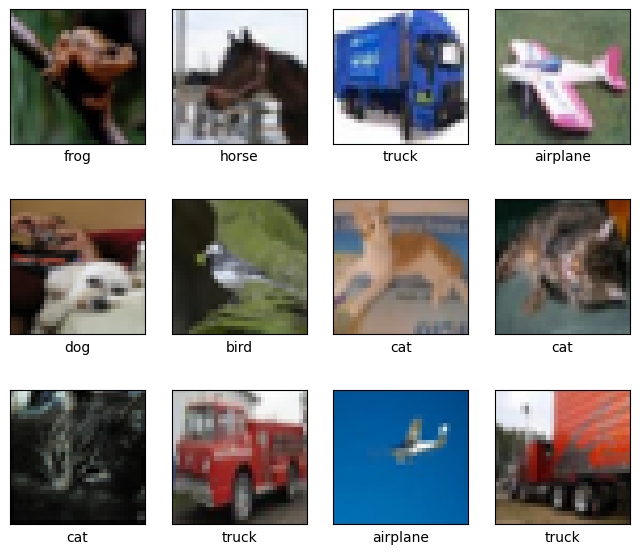

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 7))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

# Build the CNN Model


In [8]:
model = keras.models.Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

# Compile and Train the Model


In [9]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

epochs = 25
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))

Epoch 1/25
1407/1407 [==============================] - 99s 70ms/step - loss: 2.1123 - accuracy: 0.2242 - val_loss: 2.2963 - val_accuracy: 0.1994
Epoch 2/25
1407/1407 [==============================] - 97s 69ms/step - loss: 1.7422 - accuracy: 0.3671 - val_loss: 1.7206 - val_accuracy: 0.3944
Epoch 3/25
1407/1407 [==============================] - 96s 68ms/step - loss: 1.5040 - accuracy: 0.4528 - val_loss: 1.6827 - val_accuracy: 0.3992
Epoch 4/25
1407/1407 [==============================] - 97s 69ms/step - loss: 1.3615 - accuracy: 0.5072 - val_loss: 1.4331 - val_accuracy: 0.4816
Epoch 5/25
1407/1407 [==============================] - 97s 69ms/step - loss: 1.2377 - accuracy: 0.5581 - val_loss: 1.2657 - val_accuracy: 0.5402
Epoch 6/25
1407/1407 [==============================] - 101s 72ms/step - loss: 1.1274 - accuracy: 0.5974 - val_loss: 1.1566 - val_accuracy: 0.5882
Epoch 7/25
1407/1407 [==============================] - 97s 69ms/step - loss: 1.0309 - accuracy: 0.6358 - val_loss: 1.0933 

# Visualizing Results

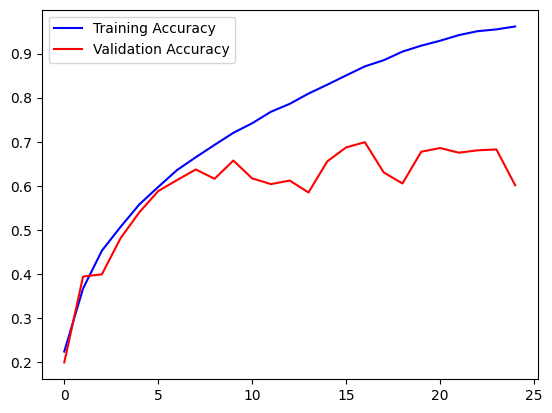

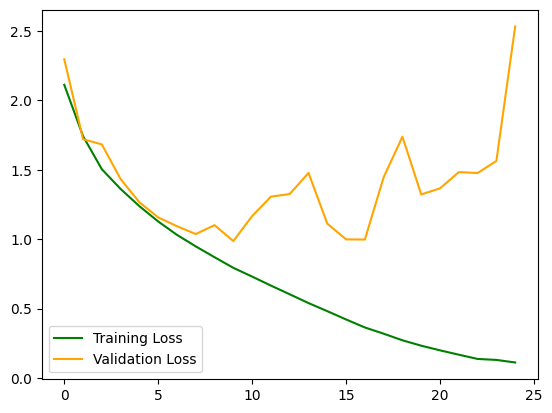

In [10]:
import matplotlib.pyplot as plt


def plot_graph():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.plot(range(epochs), acc, "b", label="Training Accuracy")
    plt.plot(range(epochs), val_acc, "r", label="Validation Accuracy")
    plt.legend()

    plt.figure()

    plt.plot(range(epochs), loss, "g", label="Training Loss")
    plt.plot(range(epochs), val_loss, "orange", label="Validation Loss")
    plt.legend()

    plt.show()

plot_graph()

# Data Augmentation


In [11]:
#from tensorflow.keras.layers import RandomFlip
#from tensorflow.keras.layers import RandomRotation
#from tensorflow.keras.layers import RandomZoom
#from tensorflow.keras.layers import RandomContrast

# for tensorflow version 2.5 or below please use the code below instead
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation
from tensorflow.keras.layers.experimental.preprocessing import RandomZoom
from tensorflow.keras.layers.experimental.preprocessing import RandomContrast


data_augmentation = Sequential([
    RandomFlip("horizontal", input_shape=(32, 32, 3)),
    RandomContrast(0.2),
    RandomRotation(0.1),
    RandomZoom(0.1),
])

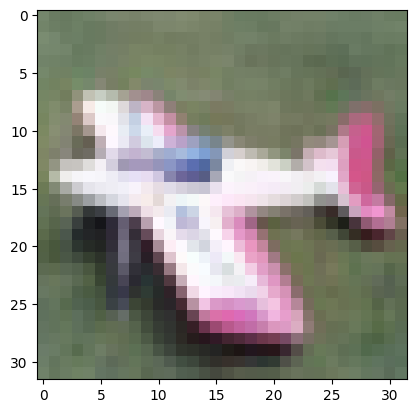

In [12]:
import matplotlib.pyplot as plt

plt.imshow(X_train[3])

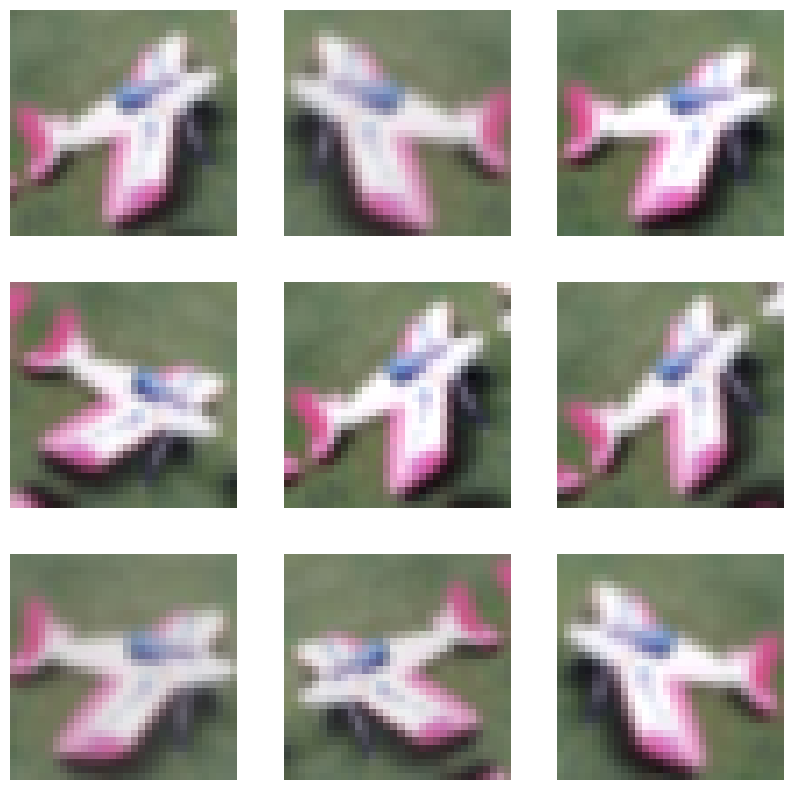

In [13]:
import tensorflow as tf

# add the image to a batch.
# the shape of the iage will be (1, 32, 32, 3)
image = tf.expand_dims(X_train[3], 0)

plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image)
    plt.subplot(3, 3, i+1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

In [14]:
model = keras.models.Sequential()
model.add(data_augmentation)
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

epochs = 25
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))

Epoch 1/25
1407/1407 [==============================] - 104s 73ms/step - loss: 2.1651 - accuracy: 0.1944 - val_loss: 1.9555 - val_accuracy: 0.2744
Epoch 2/25
1407/1407 [==============================] - 102s 72ms/step - loss: 1.8709 - accuracy: 0.3266 - val_loss: 1.7338 - val_accuracy: 0.3688
Epoch 3/25
1407/1407 [==============================] - 102s 73ms/step - loss: 1.6748 - accuracy: 0.3951 - val_loss: 1.5411 - val_accuracy: 0.4296
Epoch 4/25
1407/1407 [==============================] - 106s 75ms/step - loss: 1.5596 - accuracy: 0.4370 - val_loss: 1.7819 - val_accuracy: 0.3724
Epoch 5/25
1407/1407 [==============================] - 103s 73ms/step - loss: 1.4843 - accuracy: 0.4652 - val_loss: 1.8891 - val_accuracy: 0.3654
Epoch 6/25
1407/1407 [==============================] - 105s 75ms/step - loss: 1.4175 - accuracy: 0.4916 - val_loss: 1.5330 - val_accuracy: 0.4790
Epoch 7/25
1407/1407 [==============================] - 103s 73ms/step - loss: 1.3570 - accuracy: 0.5144 - val_loss: 1

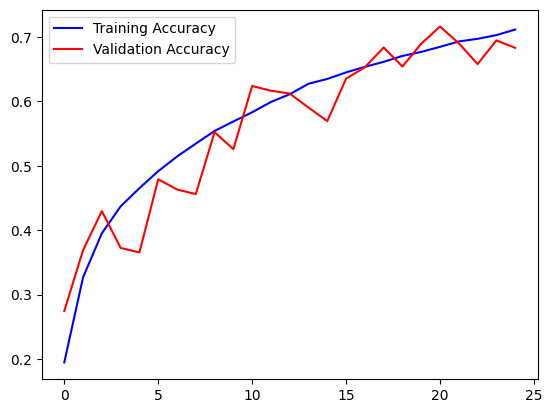

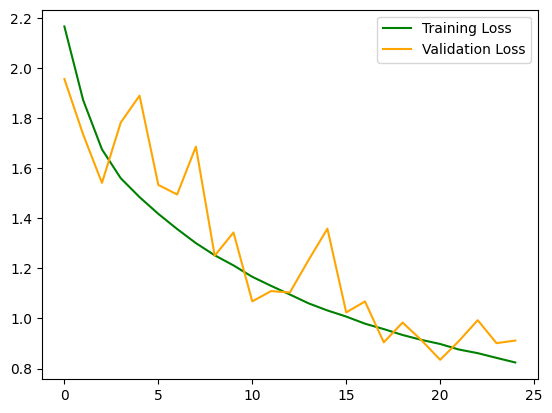

In [15]:
plot_graph()

# Evaluate the Model


In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.9648 - accuracy: 0.6549


[0.9647743105888367, 0.6549000144004822]